In [1]:
import numpy as np
import matplotlib.pyplot as plt

Data Loading

In [2]:
path="D:\Akanksha\IIT Mandi\Sem2\Deep Learning\Assignment 1\Group11\Regression\\UnivariateData\\11.csv"
with open(path,'r') as f:
    data=f.read()

In [3]:
data=data.splitlines()
dat=[]
for i in range(len(data)):
    dat.append(data[i].split(","))
dat=np.float_(np.array(dat))

In [4]:
X=dat[:,0]
Y=dat[:,1]
print("X:",X)
print("Y:",Y)

X: [0.109 0.044 0.673 ... 0.246 0.301 0.323]
Y: [1.3716 1.0582 3.1958 ... 2.613  2.9865 3.2349]


Splitting Data

In [5]:
index60=int(0.6*len(X))
index20=int(0.2*len(X))
XTrain1D=X[:index60]
YTrain1D=Y[:index60]
XVal1D=X[index60:index60+index20]
YVal1D=Y[index60:index60+index20]
XTest1D=X[index60+index20:]
YTest1D=Y[index60+index20:]

Plot

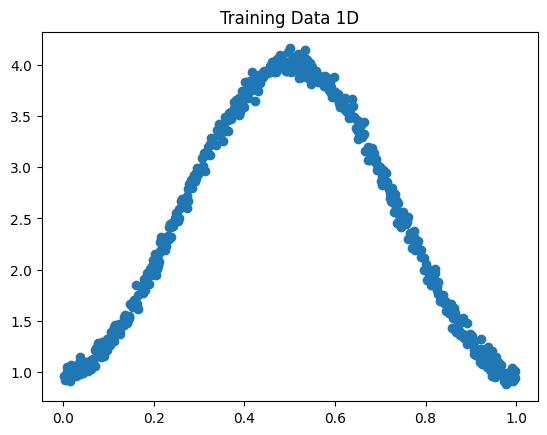

In [6]:
plt.scatter(XTrain1D,YTrain1D)
plt.title("Training Data 1D")
plt.show()

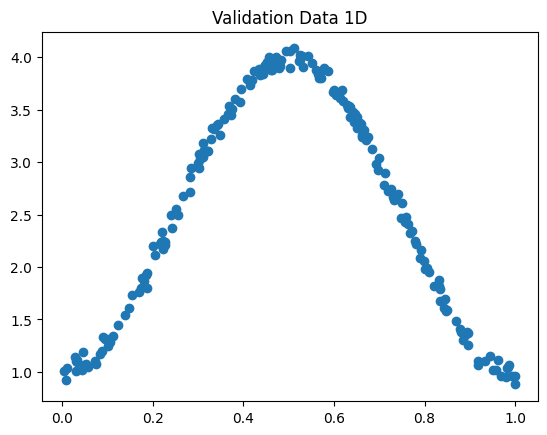

In [7]:
plt.scatter(XVal1D,YVal1D)
plt.title("Validation Data 1D")
plt.show()

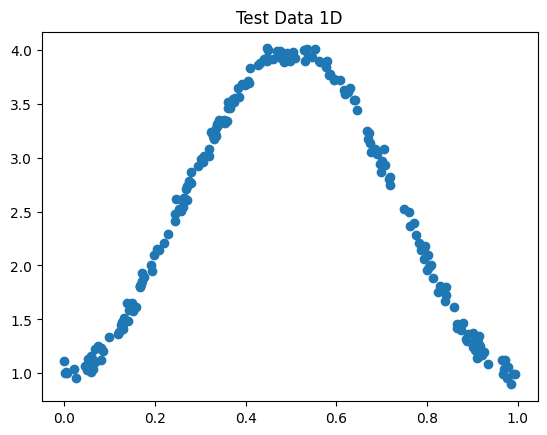

In [8]:
plt.scatter(XTest1D,YTest1D)
plt.title("Test Data 1D")
plt.show()

One Node

In [9]:
def layer(NoIpN,NoN,X):
    w1=np.zeros((NoN,NoIpN+1))
    if max(X)>=1:
        w1+=np.random.randint(int(min(X)),int(max(X)),size=(NoN,NoIpN+1))
    w2=np.random.rand(NoN,NoIpN+1)
    w=w1+w2
    #op=np.matmul(w,x)
    #w=weight()
    return w

In [10]:
def weghtInit(hidLay,hidN,ip,op):
    W=[]
    if type(ip[0])!=list:
        W.append(layer(1,hidN,ip))
    else:
        W.append(layer(len(ip[0]),hidN,ip))
    for i in range(hidLay-1):
        W.append(layer(hidN,hidN,ip))
    W.append(layer(hidN,op,ip))
    return W

In [11]:
def Weight(err,x):
    if type(err)==float:
        return err*x
    else:
        return np.matmul(err,np.transpose(x))
        #return np.matmul(np.transpose(err),np.transpose(x))
        #return np.matmul(np.transpose(err),x)
        #return np.matmul(err,x)

In [12]:
def sigmoidal(a):
    op=1/(1+np.exp(-a))
    return op

In [13]:
def sigdel(a,X):
    d=(np.exp(-a)/((1+np.exp(-a))**2))*(np.ones(np.shape(X)))
    return d

In [14]:
def FCNN(hidL,ip,op,W,z,b):
    eta=0.1
    z[0]+=ip
    b[0]+=ip
    for i in range(len(W)):
        x=[]
        x.append(1)
        if type(ip)!=list:
            x.append(ip)
        else:
            for k in range(len(ip)):
                x.append(ip[k])
        ip=np.array(x)
        ip=np.matmul(W[i],ip)
        ip=list(ip)
        print(ip)
        if i<(hidL-1):
            b[i]+=ip
        if i>0 and i<(hidL-2):
            ip=sigmoidal(ip)
        if i<(hidL-1):
            z[i]+=ip
        print(z[i])
    err=op-ip
    #err=np.array(err)
    W=W[::-1]
    b=b[::-1]
    z=z[::-1]
    for j in range(len(W)):
        w=W[j]
        if j<(len(W)-1):
            w=w[0][1:]
        #print(w)
        if j==0:
            a=float(err)
            #a=err
        else:
            if hidL!=1:
                #print("shape",np.shape(sigdel(b[j],z[j-1])))
                a*=sigdel(b[j],z[j-1])
        #print("w",w)
        #print("a",a)
        #print("z",z[j])
        #print(np.shape(a))
        #print(a)
        #print(np.shape(w))
        #print(w)
        #print(np.shape(z[j]))
        if type(a)!=float:
            a=np.reshape(a,newshape=(np.shape(a)[0],1))
            #print(np.shape(a))
        z[j]=np.reshape(z[j],newshape=(np.shape(z[j])[0],1))
        #print(np.shape(z[j]))
        #print("nt",eta*Weight(a,z[j]))
        #print(W[j])
        if type(a)==float:
            W[j]+=np.transpose(eta*Weight(a,z[j]))
            a*=W[j]
        else:
            W[j]+=eta*Weight(a,z[j])
            if j<hidL-1:
                a=np.matmul(a,W[j])
    W=W[::-1]
    err=(err**2)/2
    return W,err
        

In [15]:
def zb(XTrain,hidLay,hidN):
    XTrain=list(XTrain)
    z=[]
    if type(XTrain[0])!=list:
        z.append(np.zeros(2))
    else:
        z.append(np.zeros(len(XTrain[0])+1))
    for i in range(hidLay):
        z.append(np.zeros(hidN+1))
    b=[]
    if type(XTrain[0])!=list:
        b.append(np.zeros(2))
    else:
        b.append(np.zeros(len(XTrain[0])+1))
    for i in range(hidLay):
        b.append(np.zeros(hidN+1))
    return z,b

In [16]:
hidenLayer=1
hidenNode=15

Training Model for univariate

In [17]:
weight1D=weghtInit(hidenLayer,hidenNode,XTrain1D,1)#len(YTrain1D[0]))
#print(np.shape(weight[0]))
#print(weight1D)
#weight=weight[::-1]
#print(weight[0])
error=[]
errr=0
epo=0
epoch=[]
diff=1
for i in range(1000):
    for i in range(len(XTrain1D)):
        z,b=zb(XTrain1D,hidenLayer,hidenNode)
        #print(np.shape(z[0]))
        #print(z)
        weight,e=FCNN(hidenLayer,XTrain1D[i],YTrain1D[i],weight1D,z,b)
        errr+=e
    epo+=1
    epoch.append(epo)
    error.append(errr/len(XTrain1D))

[0.7647318300931285, 0.9875613451170405, 0.5566537639876856, 0.8307070607867957, 0.7506707188183762, 0.1011500681454033, 0.6505442661689373, 0.14765588672895347, 0.7681764703742067, 0.07151103477257431, 0.42499083242536506, 0.9932258418256693, 0.31887629285440405, 0.18566715142042978, 0.5618317167598172]
[0.109 0.109]
[3.7391700572894213]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


ValueError: cannot reshape array of size 16 into shape (1,1)

NameError: name 'check' is not defined

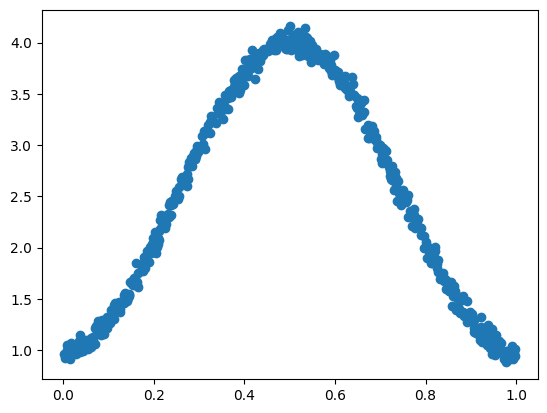

In [18]:
plt.scatter(XTrain1D,YTrain1D)
plt.scatter(XTrain1D,check(XTrain1D,weight1D))
plt.show()

In [109]:
PredTrain=check(XTrain1D,weight1D)
TrainErr=errorr(PredTrain,YTrain1D)
print("Average Error for validation data = ",TrainErr)

Average Error for validation data =  [1.07830126]


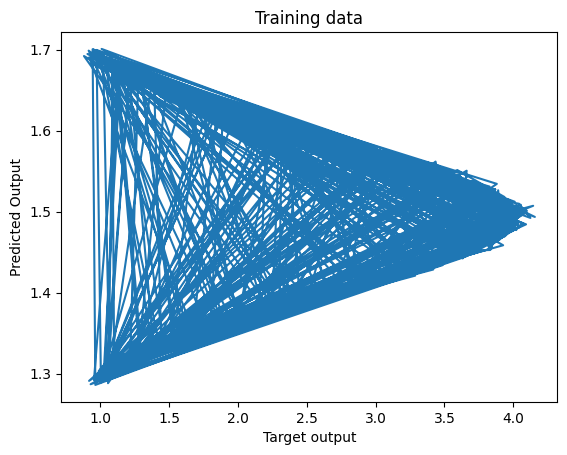

In [140]:
plt.plot(YTrain1D,PredTrain)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("Training data")
plt.show()

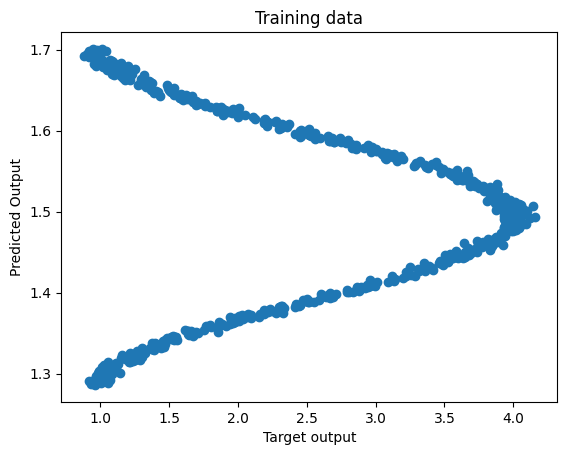

In [141]:
plt.scatter(YTrain1D,PredTrain)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("Training data")
plt.show()

Validating Data

In [112]:
PredVal=check(XVal1D,weight1D)
ValErr=errorr(PredVal,YVal1D)
#ValAcc=(1-ValErr)*100
#print("Accuracy for validation data = ",ValAcc)
print("Average Error for validation data = ",ValErr)

Average Error for validation data =  [1.15031334]


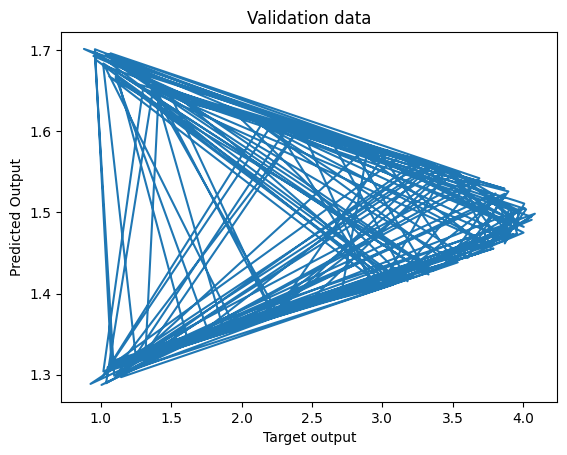

In [142]:
plt.plot(YVal1D,PredVal)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("Validation data")
plt.show()

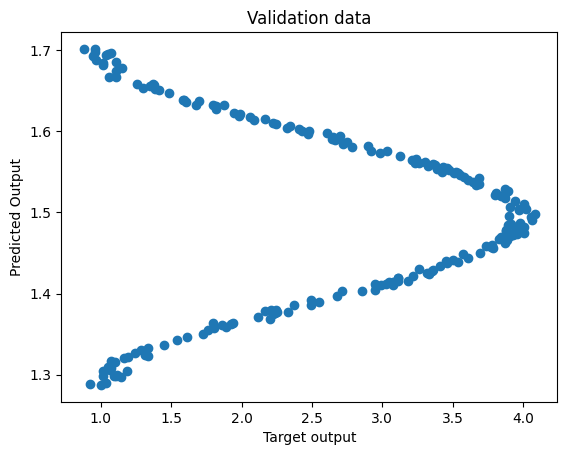

In [143]:
plt.scatter(YVal1D,PredVal)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("Validation data")
plt.show()

Testing Data

In [115]:
PredTest=check(XTest1D,weight1D)
TestErr=errorr(PredTest,YTest1D)
TestAcc=(1-TestErr)*100
print("Accuracy for test data = ",TestAcc)

Accuracy for test data =  [-0.75412942]


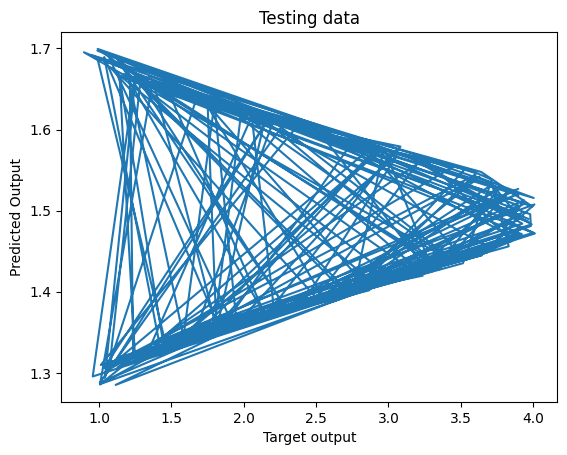

In [144]:
plt.plot(YTest1D,PredTest)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("Testing data")
plt.show()

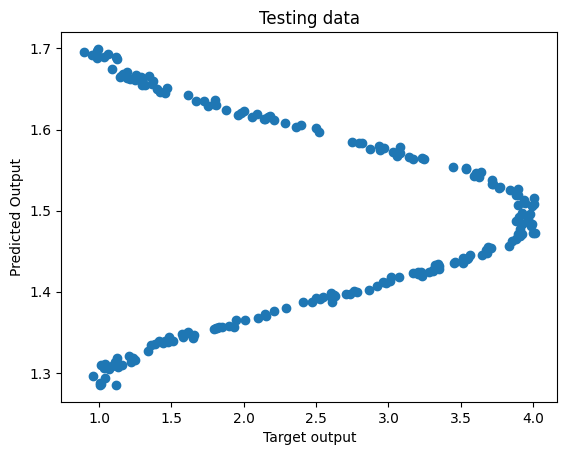

In [145]:
plt.scatter(YTest1D,PredTest)
plt.xlabel("Target output")
plt.ylabel("Predicted Output")
plt.title("Testing data")
plt.show()

Plotting decision boundary

In [104]:
for i in range(len(XTrain1D))

SyntaxError: expected ':' (2668730506.py, line 1)

In [ ]:
f=[[1,2],[3,4],[5,7]]
g=[[2],[2]]
d=[]
d.append(np.array(f))
d.append(np.array(g))
z=[1,2]
z=np.array(z)
p=np.matmul(d[0],z)
print(len(d))
print(p)
s=d[::-1]
print(s)
k=[]
k.append(1)
k.append(2)
for i in range(len(z)):
    k.append(z[i])
np.array(k)
d[1][1:]

2
[ 5 11 19]
[array([[2],
       [2]]), array([[1, 2],
       [3, 4],
       [5, 7]])]


array([[2]])

In [ ]:
#g=[[0,0],[0,0,0],[0,0]]
g=[np.zeros(2)]
g[0]+=list(z)
g

[array([1., 2.])]

In [ ]:
a=[1,[1,2]]
if type(a[0])!=list:
    print("int")
#d=np.array(d)
d[:,0]

int


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

In [ ]:
v=[np.array([0., 0.]), np.array([0., 0., 0., 0., 0.])]
np.matmul(v[0],z)

0.0